In [45]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Configuración de visualización de gráficos
#plt.style.use('seaborn')
# Cargar y explorar el conjunto de datos principal
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
data = pd.read_csv(url)


In [47]:
# Cargar y explorar el conjunto de datos adicional
# Supongamos que tenemos un archivo CSV llamado 'additional_housing_data.csv'
# Para este ejemplo, crearemos un DataFrame adicional simulado.
additional_data = pd.DataFrame({
    'total_bedrooms': np.random.randint(1, 6, data.shape[0]),
    'total_bathrooms': np.random.randint(1, 4, data.shape[0])
})

In [48]:
# Unir los dos conjuntos de datos
data = pd.concat([data, additional_data], axis=1)

# Exploramos los datos
print(data.head())
print(data.info())
print(data.describe())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   total_bedrooms  total_bathrooms  
0               4              

In [49]:

# Proceso de limpieza
# Eliminar duplicados
data.drop_duplicates(inplace=True)

In [50]:
# Manejar valores faltantes
numerical_columns = data.select_dtypes(include=[np.number]).columns
fill_values = {col: data[col].median() for col in numerical_columns}
data = data.fillna(value=fill_values)

# Verificar las columnas disponibles después de llenar los valores faltantes
print(data.columns)

# Asumiendo que 'ocean_proximity' ya está codificado como columnas separadas
# No es necesario llamar pd.get_dummies nuevamente

# Continuar con el resto de tu análisis o procesamiento de datos



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_bedrooms',
       'total_bathrooms'],
      dtype='object')


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
total_bedrooms        0
total_bathrooms       0
dtype: int64


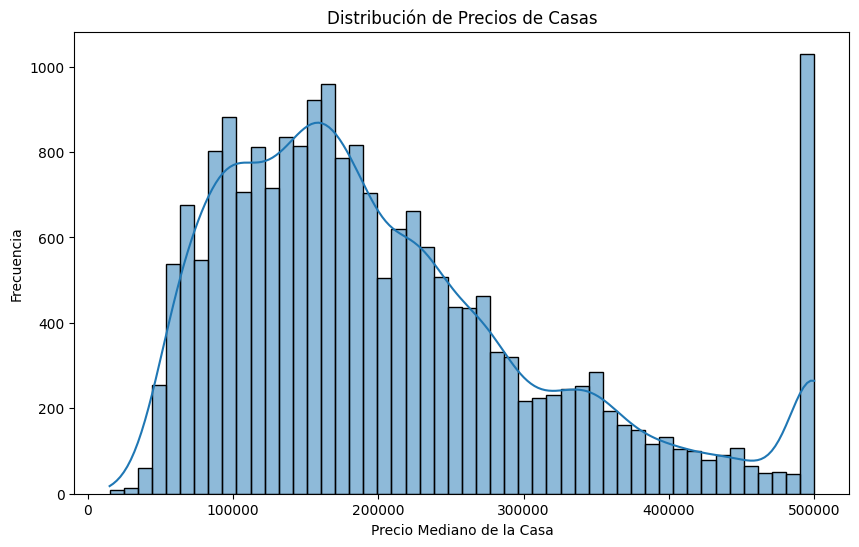

In [51]:
# Verificar si hay valores NaN restantes
print(data.isnull().sum())

# Análisis exploratorio de datos (EDA)
# Histograma de los precios medianos de las casas
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], bins=50, kde=True)
plt.title('Distribución de Precios de Casas')
plt.xlabel('Precio Mediano de la Casa')
plt.ylabel('Frecuencia')
plt.show()

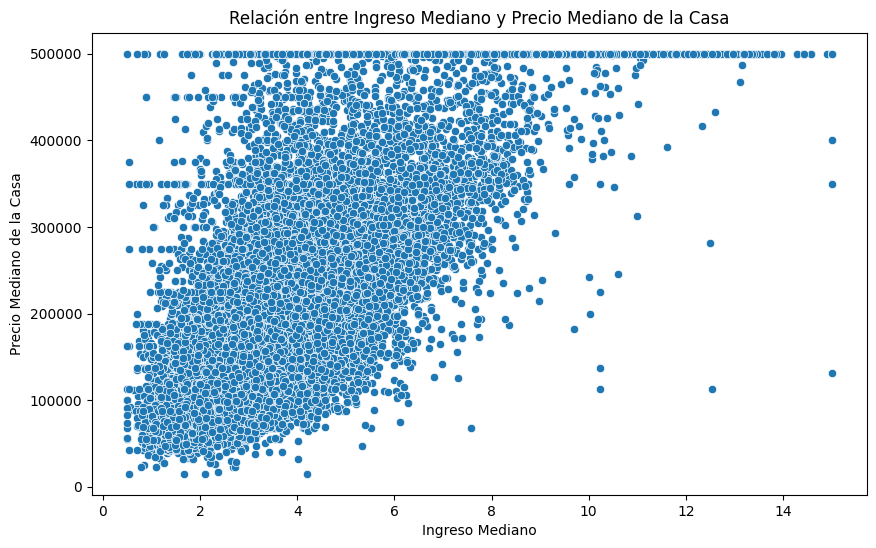

In [52]:

# Relación entre ingreso mediano y precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Relación entre Ingreso Mediano y Precio Mediano de la Casa')
plt.xlabel('Ingreso Mediano')
plt.ylabel('Precio Mediano de la Casa')
plt.show()

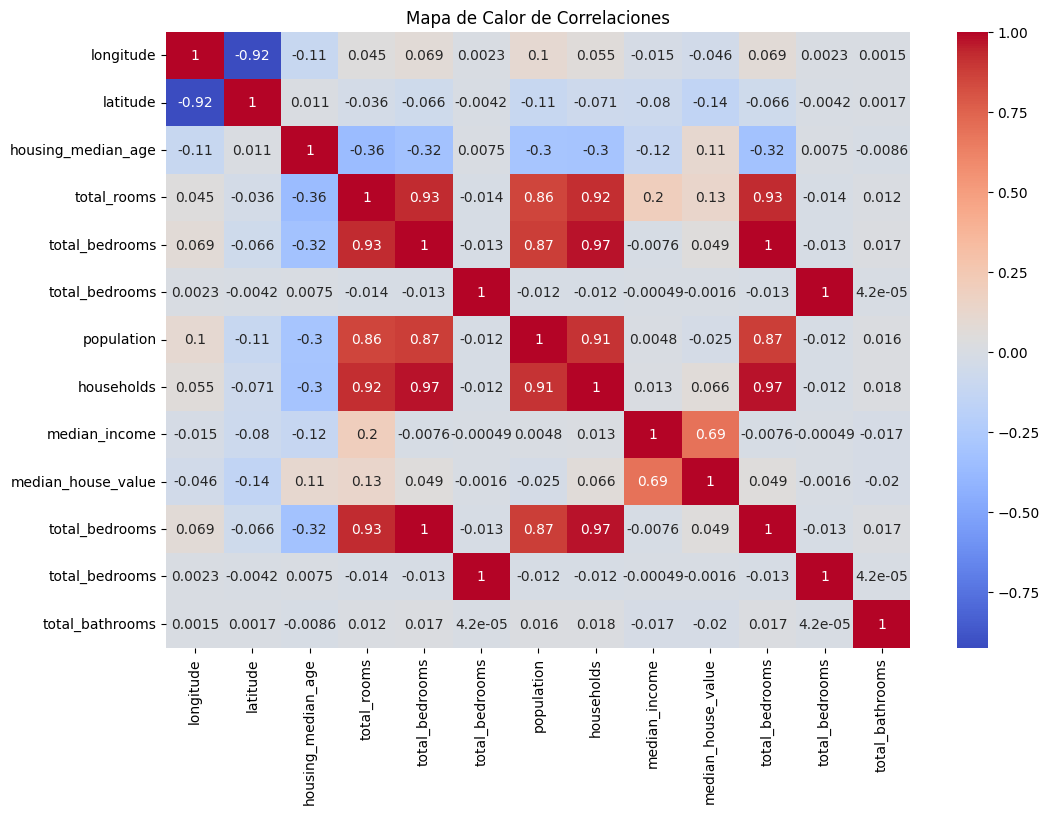

In [54]:
# Codificar variables categóricas
# En este dataset, 'ocean_proximity' es una variable categórica
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Seleccionar solo columnas numéricas para calcular la correlación
numerical_columns = data_encoded.select_dtypes(include=[np.number]).columns

# Calcular correlación entre variables numéricas
correlation_matrix = data_encoded[numerical_columns].corr()

# Visualizar el mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [55]:
# Entrenamiento de un modelo de Machine Learning
# Selección de características y variable objetivo
# Vamos a usar algunas características relevantes para este ejemplo
features = ['median_income', 'total_rooms', 'housing_median_age', 'population', 'total_bedrooms', 'total_bathrooms'] + \
           [col for col in data.columns if 'ocean_proximity' in col]
X = data[features]
y = data['median_house_value']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Codificar variables categóricas en X_train y X_test
X_train = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['ocean_proximity'], drop_first=True)

# Llenar valores faltantes en X_test con cero
X_test.fillna(0, inplace=True)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [60]:
# Evaluación del modelo
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 5192914458.529505
R^2: 0.6037180342353499


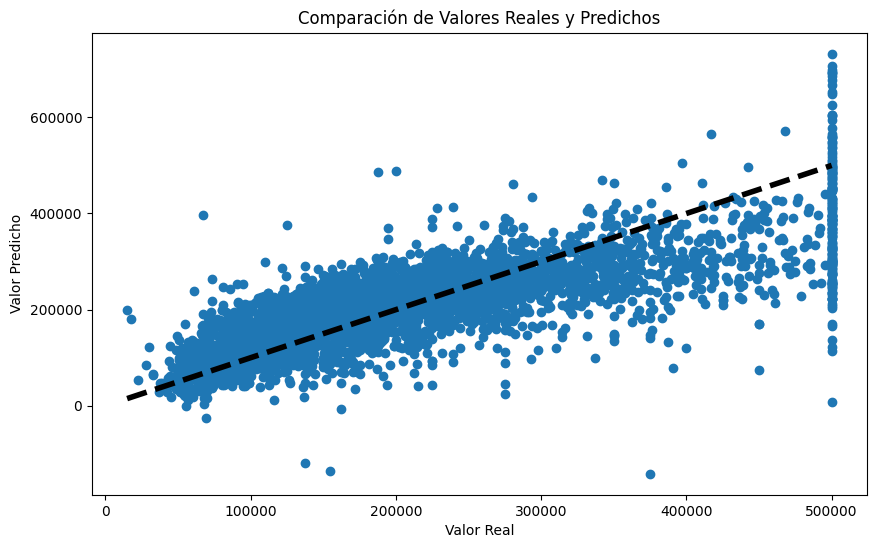

In [61]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Comparación de Valores Reales y Predichos')
plt.show()

In [62]:
# Conclusiones
# Analizar los resultados obtenidos
print("Conclusiones:")
print(f"1. El modelo de regresión lineal muestra un R^2 de {r2:.2f}, lo que indica que el modelo explica aproximadamente el {r2*100:.2f}% de la variabilidad en los precios de las casas.")
print(f"2. El MSE obtenido es {mse:.2f}, lo que indica el promedio de los errores al cuadrado entre los valores predichos y los reales.")
print("3. Según el análisis exploratorio, variables como el ingreso mediano, número total de habitaciones, edad mediana de la vivienda y población tienen una relación significativa con los precios de las casas.")


Conclusiones:
1. El modelo de regresión lineal muestra un R^2 de 0.60, lo que indica que el modelo explica aproximadamente el 60.37% de la variabilidad en los precios de las casas.
2. El MSE obtenido es 5192914458.53, lo que indica el promedio de los errores al cuadrado entre los valores predichos y los reales.
3. Según el análisis exploratorio, variables como el ingreso mediano, número total de habitaciones, edad mediana de la vivienda y población tienen una relación significativa con los precios de las casas.
